In [1]:
import tensorflow as tf
from matplotlib import pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from keras.optimizers import Adam, SGD
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import itertools
import random
import warnings
import numpy as np
import cv2
from keras.callbacks import ReduceLROnPlateau
from keras.callbacks import ModelCheckpoint, EarlyStopping
warnings.simplefilter(action='ignore', category=FutureWarning)

from PIL import Image

In [2]:
train_path = r'C:\Users\yuvat\project SLD\data2\train'
test_path = r'C:\Users\yuvat\project SLD\data2\test'
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=train_path,
                                                                                                                            target_size=(64,64),
                                                                                                                            class_mode='categorical', 
                                                                                                                            batch_size=10,
                                                                                                                            shuffle= True)

test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input).flow_from_directory(directory=test_path,
                                                                                                                            target_size=(64,64),
                                                                                                                            class_mode='categorical', 
                                                                                                                            batch_size=10,
                                                                                                                            shuffle= True)

Found 31952 images belonging to 36 classes.
Found 10800 images belonging to 36 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

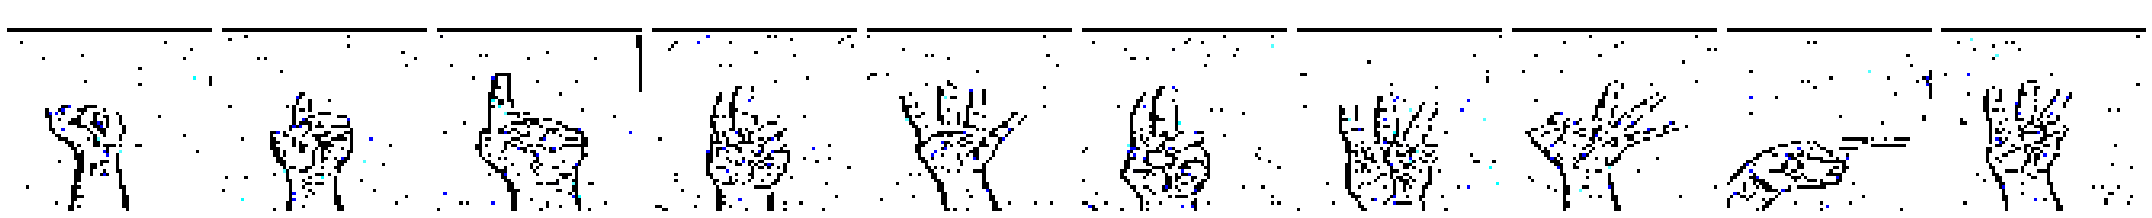

(10, 64, 64, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
  0. 0

In [3]:
imgs,labels = next(train_batches)

# plotting the images...
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(30,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
print(imgs.shape)
print(labels)

In [4]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding= 'same'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding = 'valid'))
model.add(MaxPool2D(pool_size=(2, 2), strides=2))

model.add(Flatten())

model.add(Dense(64, activation ='relu'))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.2))
model.add(Dense(128, activation = 'relu'))
#model.add(Dropout(0.3))
model.add(Dense(36, activation = 'softmax'))

In [5]:
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 1,
                              min_lr = 0.0001)

early_stop = EarlyStopping(monitor = 'val_loss',
                           min_delta = 0,
                           patience = 2,
                           verbose = 0,
                           mode = 'auto')




model.compile(optimizer = SGD(learning_rate = 0.001),
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 1,
                              min_lr = 0.0005)

early_stop = EarlyStopping(monitor = 'val_loss',
                           min_delta = 0,
                           patience = 2,
                           verbose = 0,
                           mode = 'auto')


In [6]:
history2 = model.fit(train_batches,
                    epochs = 10,
                    callbacks = [reduce_lr, early_stop],
                    validation_data = test_batches)

Epoch 1/10
3196/3196 [==============================] - 1237s 387ms/step - loss: 0.7831 - accuracy: 0.7834 - val_loss: 0.4637 - val_accuracy: 0.8887
Epoch 2/10
3196/3196 [==============================] - 878s 275ms/step - loss: 0.0291 - accuracy: 0.9916 - val_loss: 0.4152 - val_accuracy: 0.9137
Epoch 3/10
3196/3196 [==============================] - 1006s 315ms/step - loss: 0.0091 - accuracy: 0.9975 - val_loss: 0.3590 - val_accuracy: 0.9284
Epoch 4/10
3196/3196 [==============================] - 927s 290ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.3737 - val_accuracy: 0.9319
Epoch 5/10
3196/3196 [==============================] - 1142s 357ms/step - loss: 5.9625e-04 - accuracy: 1.0000 - val_loss: 0.3809 - val_accuracy: 0.9337


In [7]:
# for getting next batch of testing imgs..

imgs, labels = next(test_batches)

scores = model.evaluate(imgs, labels, verbose= 0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')


model.save('best_model_data1.h5')

loss of 0.004982936196029186; accuracy of 100.0%


{'loss': [0.7830640077590942, 0.029096411541104317, 0.00908978097140789, 0.0014217637944966555, 0.0005962499999441206], 'accuracy': [0.7833625674247742, 0.991612434387207, 0.997527539730072, 0.9997808933258057, 0.9999687075614929], 'val_loss': [0.463657408952713, 0.4152173697948456, 0.35903090238571167, 0.37371736764907837, 0.38091138005256653], 'val_accuracy': [0.8887037038803101, 0.9137036800384521, 0.9284259080886841, 0.931851863861084, 0.9337037205696106], 'lr': [0.001, 0.001, 0.001, 0.001, 0.0005]}
loss of 0.5374890565872192; accuracy of 89.99999761581421%
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

prediction on a small set of test data---

U B Zero V Nine C Seven B Five Three 

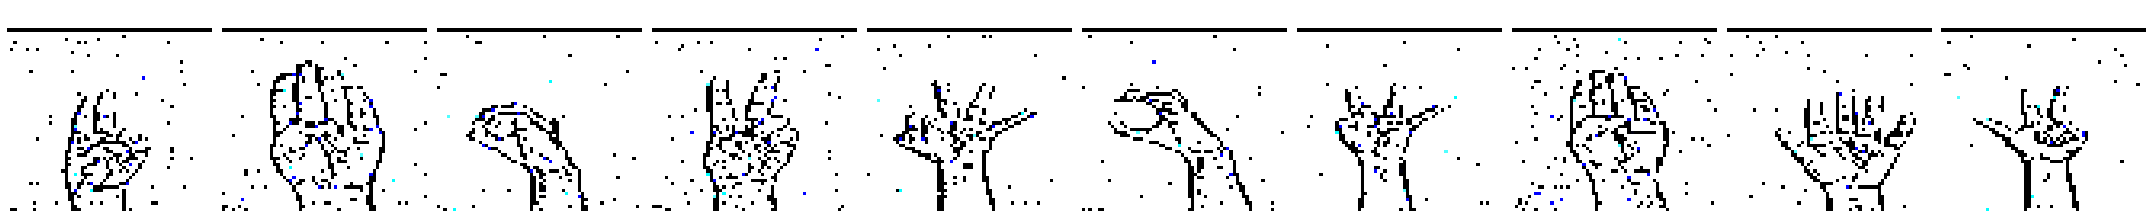

Actual labels
U B Zero V Nine C Eight B Five Three (10, 64, 64, 3)


{'loss': [0.7830640077590942,
  0.029096411541104317,
  0.00908978097140789,
  0.0014217637944966555,
  0.0005962499999441206],
 'accuracy': [0.7833625674247742,
  0.991612434387207,
  0.997527539730072,
  0.9997808933258057,
  0.9999687075614929],
 'val_loss': [0.463657408952713,
  0.4152173697948456,
  0.35903090238571167,
  0.37371736764907837,
  0.38091138005256653],
 'val_accuracy': [0.8887037038803101,
  0.9137036800384521,
  0.9284259080886841,
  0.931851863861084,
  0.9337037205696106],
 'lr': [0.001, 0.001, 0.001, 0.001, 0.0005]}

In [8]:
print(history2.history)

imgs, labels = next(test_batches)

model = keras.models.load_model(r"best_model_data.h5")

scores = model.evaluate(imgs, labels, verbose= 0)
print(f'{model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

model.summary()

scores #[loss, accuracy] on test data...
model.metrics_names


word_dict = {0:'Zero',1:'One',2:'Two',3:'Three',4:'Four',5:'Five',6:'Six',7:'Seven',8:'Eight',9:'Nine',10:'A',11:'B',12:'C',13:'D',14:'E',15:'F',16:'G',17:'H',18:'I',19:'J',20:'K',21:'L',22:'M',23:'N',24:'O',25:'P',26:'Q',27:'R',28:'S',29:'T',30:'U',31:'V',32:'W',33:'X',34:'Y',35 :'Z'}

predictions = model.predict(imgs, verbose=0)
print("prediction on a small set of test data---")
print("")
for ind, i in enumerate(predictions):
    print(word_dict[np.argmax(i)], end=' ')
    
plotImages(imgs)
print('Actual labels')
for i in labels:
    print(word_dict[np.argmax(i)], end=' ')
    
print(imgs.shape)

history2.history